### Writing an iterator to load data in chunks (4)
In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot have been imported as pd and plt respectively for your use.

### Instructions

- Initialize an empty DataFrame data using pd.DataFrame().
- In the for loop, iterate over urb_pop_reader to be able to process all the DataFrame chunks in the dataset.
- Using the method append() of the DataFrame data, append df_pop_ceb to data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\shakib\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


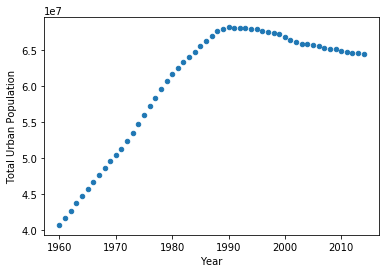

In [5]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data =  data.append(df_pop_ceb)


# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()
